<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Elabora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Escoger conjunto de datos y métricas para la clasificación.


In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
iris = datasets.load_iris()


# 2. Dividir datos en entrenamiento y prueba

In [ ]:
X,y=datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25)
X_train.shape

(112, 4)

In [ ]:
print(X_train,y_train)

[[5.1 3.8 1.5 0.3]
 [4.6 3.1 1.5 0.2]
 [6.5 2.8 4.6 1.5]
 [5.  3.3 1.4 0.2]
 [5.8 4.  1.2 0.2]
 [6.  3.4 4.5 1.6]
 [6.3 3.3 6.  2.5]
 [6.7 3.3 5.7 2.5]
 [7.7 3.  6.1 2.3]
 [7.  3.2 4.7 1.4]
 [5.8 2.7 5.1 1.9]
 [5.1 3.5 1.4 0.3]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.2 2.3]
 [6.5 3.  5.8 2.2]
 [7.7 2.8 6.7 2. ]
 [6.3 3.4 5.6 2.4]
 [6.7 3.  5.  1.7]
 [7.3 2.9 6.3 1.8]
 [6.9 3.1 5.1 2.3]
 [4.7 3.2 1.3 0.2]
 [5.  3.4 1.6 0.4]
 [5.5 3.5 1.3 0.2]
 [6.7 3.3 5.7 2.1]
 [7.2 3.  5.8 1.6]
 [5.1 3.3 1.7 0.5]
 [6.5 3.  5.2 2. ]
 [7.9 3.8 6.4 2. ]
 [4.6 3.2 1.4 0.2]
 [6.7 2.5 5.8 1.8]
 [6.3 3.3 4.7 1.6]
 [5.1 3.8 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [4.9 3.1 1.5 0.2]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [4.8 3.  1.4 0.3]
 [6.1 2.6 5.6 1.4]
 [4.5 2.3 1.3 0.3]
 [5.7 4.4 1.5 0.4]
 [6.  3.  4.8 1.8]
 [5.6 3.  4.5 1.5]
 [4.9 3.  1.4 0.2]
 [4.8 3.1 1.6 0.2]
 [5.7 2.8 4.5 1.3]
 [4.8 3.  1.4 0.1]
 [6.7 3.1 4.4 1.4]
 [5.  2.3 3.3 1. ]
 [6.1 2.9 4.7 1.4]
 [5.  3.5 1.3 0.3]
 [5.5 2.5 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [7.2 3.2 6.

In [ ]:
print(X_test,y_test)

[[6.8 3.2 5.9 2.3]
 [6.3 2.9 5.6 1.8]
 [5.9 3.  4.2 1.5]
 [5.  3.4 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [6.4 2.8 5.6 2.2]
 [5.6 2.8 4.9 2. ]
 [6.1 2.8 4.  1.3]
 [6.7 3.1 4.7 1.5]
 [5.6 3.  4.1 1.3]
 [4.4 3.2 1.3 0.2]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [6.9 3.1 5.4 2.1]
 [6.8 3.  5.5 2.1]
 [5.3 3.7 1.5 0.2]
 [5.8 2.7 4.1 1. ]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [5.1 3.8 1.9 0.4]
 [5.  3.  1.6 0.2]
 [6.4 3.2 5.3 2.3]
 [5.5 2.6 4.4 1.2]
 [7.1 3.  5.9 2.1]
 [5.7 3.  4.2 1.2]
 [4.9 3.6 1.4 0.1]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [6.  2.2 5.  1.5]
 [4.7 3.2 1.6 0.2]
 [6.9 3.1 4.9 1.5]
 [5.7 3.8 1.7 0.3]
 [6.2 2.2 4.5 1.5]
 [5.2 4.1 1.5 0.1]
 [6.5 3.  5.5 1.8]
 [5.2 3.4 1.4 0.2]
 [6.3 2.5 5.  1.9]] [2 2 1 0 1 2 2 1 1 1 0 1 1 2 2 0 1 0 2 2 0 0 2 1 2 1 0 0 0 2 0 1 0 1 0 2 0
 2]


# 3. Implementación de 3 estrategias de selección de modelo usando pipelines de sklearn.

## 3.1 Estrategia Gridsearch (pipeline con scaler y KNN)

In [ ]:
pipelineG = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
p_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

In [ ]:
cv = 3
grid_search = GridSearchCV(pipelineG, p_grid, cv=cv, scoring = 'neg_root_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00253701, 0.00168872, 0.00179601, 0.00197721, 0.00231846,
        0.00179784]),
 'std_fit_time': array([1.11842404e-03, 5.82610326e-05, 1.15658980e-04, 1.69866615e-04,
        5.67075014e-04, 1.62245356e-05]),
 'mean_score_time': array([0.00456103, 0.00140572, 0.0029757 , 0.00170708, 0.00300392,
        0.00153772]),
 'std_score_time': array([2.13747437e-03, 4.52756819e-05, 1.91130228e-04, 1.85084391e-04,
        4.80764166e-05, 7.65152378e-05]),
 'param_knn__n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_knn__weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 3, 'knn__weights': 'uniform'},
  {'knn__n_neighbors': 3, 'knn_

In [ ]:
best_model = grid_search.best_estimator_
print("Mejor modelo:", best_model)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
scores = cross_val_score(best_model, X, y, cv=cv)
mean_score = np.mean(scores)
print("Rendimiento del mejor modelo:", mean_score)

results_grid=grid_search.cv_results_

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])
Mejores hiperparámetros: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Rendimiento del mejor modelo: 0.9666666666666667


In [ ]:
# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)
# Calcular el test score utilizando la precisión
test_scoreG = accuracy_score(y_test, y_pred)

print("Test Score (Accuracy):", test_scoreG)

Test Score (Accuracy): 0.9736842105263158


## 3.2 Estrategia Randomsearch (pipeline con scaler, imputer y MLP)

In [ ]:
pipelineR = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer()),
    ('mlp', MLPClassifier())
])

In [ ]:
param_dist = {
    'imputer__strategy': ['mean', 'median'],  # Estrategia para manejar valores faltantes
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Tamaños de capas ocultas
    'mlp__alpha': [0.0001, 0.001, 0.01],      # Regularización L2
    'mlp__learning_rate_init': [0.001, 0.01, 0.1]  # Tasa de aprendizaje inicial
}

In [ ]:
random_search = RandomizedSearchCV(pipelineR, param_distributions=param_dist, n_iter=5, n_jobs = 4, cv = 5, random_state = None, scoring = 'neg_root_mean_squared_error', refit=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('imputer', SimpleImputer()),
                                             ('mlp', MLPClassifier())]),
                   n_iter=5, n_jobs=4,
                   param_distributions={'imputer__strategy': ['mean', 'median'],
                                        'mlp__alpha': [0.0001, 0.001, 0.01],
                                        'mlp__hidden_layer_sizes': [(50,),
                                                                    (100,),
                                                                    (50, 50),
                                                                    (100, 100)],
                                        'mlp__learning_rate_init': [0.001, 0.01,
                                                                    0.1]},
                   scoring='neg_root_mean_squared_error')

In [ ]:
best_scoreR = random_search.best_score_
print("Rendimiento del mejor modelo:", best_scoreR)
best_paramsR = random_search.best_params_
print("Mejores hiperparámetros:", best_paramsR)

Rendimiento del mejor modelo: -0.21811196359180265
Mejores hiperparámetros: {'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__alpha': 0.001, 'imputer__strategy': 'mean'}


In [ ]:
# Obtener el mejor modelo con los hiperparámetros óptimos
best_model = random_search.best_estimator_

In [ ]:
# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el test score utilizando la precisión
test_scoreR = accuracy_score(y_test, y_pred)

print("Test Score (Accuracy):", test_scoreR)

Test Score (Accuracy): 0.9736842105263158


## 3.3 Estrategia coarse-finer search (pipeline con scaler, pca y randomForest)

In [ ]:
pipelineC = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier())
])

In [ ]:
param_coarse = {
    'pca__n_components': [2, 3, 4],  # Número de componentes principales
    'rf__n_estimators': [50, 100],  # Número de árboles
    'rf__max_depth': [5, 10]  # Profundidad máxima de los árboles
}


In [ ]:
grid_coarse = GridSearchCV(pipelineC, param_grid = param_coarse, n_jobs = 4, cv = 5, scoring = 'neg_root_mean_squared_error', refit=True)
grid_coarse.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'pca__n_components': [2, 3, 4],
                         'rf__max_depth': [5, 10],
                         'rf__n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print("Mejores hiperparámetros encontrados en la búsqueda gruesa:")
print(grid_coarse.best_params_)

Mejores hiperparámetros encontrados en la búsqueda gruesa:
{'pca__n_components': 4, 'rf__max_depth': 5, 'rf__n_estimators': 50}


In [ ]:
param_grid_fine = {
    'pca__n_components': [grid_coarse.best_params_['pca__n_components'], grid_coarse.best_params_['pca__n_components'] + 1, grid_coarse.best_params_['pca__n_components'] - 1],
    'rf__n_estimators': [grid_coarse.best_params_['rf__n_estimators'] - 10, grid_coarse.best_params_['rf__n_estimators'], grid_coarse.best_params_['rf__n_estimators'] + 10],
    'rf__max_depth': [grid_coarse.best_params_['rf__max_depth'], grid_coarse.best_params_['rf__max_depth'] + 1, grid_coarse.best_params_['rf__max_depth'] - 1]
}

In [ ]:
grid_search_fine = GridSearchCV(pipelineC, param_grid = param_grid_fine, n_jobs = 4, cv = 3, scoring = 'neg_root_mean_squared_error', refit=True)
grid_search_fine.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pac

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'pca__n_components': [4, 5, 3],
                         'rf__max_depth': [5, 6, 4],
                         'rf__n_estimators': [40, 50, 60]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados en la búsqueda fina:")
print(grid_search_fine.best_params_)

Mejores hiperparámetros encontrados en la búsqueda fina:
{'pca__n_components': 4, 'rf__max_depth': 6, 'rf__n_estimators': 60}


In [ ]:
# Obtener el mejor modelo con los hiperparámetros óptimos de la estrategia coarse
best_model_coarse = grid_coarse.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo coarse
y_pred_coarse = best_model_coarse.predict(X_test)

# Calcular el test score utilizando la métrica de precisión (accuracy) para la estrategia coarse
test_score_coarse = accuracy_score(y_test, y_pred_coarse)

# Obtener el mejor modelo con los hiperparámetros óptimos de la estrategia finer
best_model_fine = grid_search_fine.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo finer
y_pred_finer = best_model_fine.predict(X_test)

# Calcular el test score utilizando la métrica de precisión (accuracy) para la estrategia finer
test_score_finer = accuracy_score(y_test, y_pred_finer)


print("Test Score (Coarse Strategy):", test_score_coarse)
print("Test Score (Finer Strategy):", test_score_finer)

Test Score (Coarse Strategy): 0.9473684210526315
Test Score (Finer Strategy): 1.0


# 4. Estimar el error esperado de generalización

## 4.1 Estrategia Gridsearch

In [ ]:
NUM_TRIALS = 35
X_iris = iris.data
y_iris = iris.target

4.1.1 35 trials de validación cruzada no anidada (non-nested cross-validation)

In [ ]:
non_nested_scoresG = []
nested_scoresG = []

In [ ]:
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=3, shuffle=True) #model selection
    outer_cv = KFold(n_splits=3, shuffle=True) #model validation

    clf = GridSearchCV(estimator=pipelineG, param_grid=p_grid, cv=inner_cv, scoring ='neg_root_mean_squared_error')
    clf.fit(X_iris, y_iris)
    non_nested_scoresG.append(clf.best_score_*-1)  # Error de generalización

In [ ]:
average_errorGn = np.mean(non_nested_scoresG)
std_scoreGn = np.std(non_nested_scoresG)
print("Estimación del error esperado de generalización:", non_nested_scoresG);
print("Promedio del error de generalización estimado:", average_errorGn)
print("Desviacion estandar:", std_scoreGn)

Estimación del error esperado de generalización: [0.19545677683854246, 0.19545677683854246, 0.20808802290397618, 0.18705891343171857, 0.14831632475943926, 0.14831632475943926, 0.25372558009838525, 0.1414213562373095, 0.21498299142610597, 0.20000000000000004, 0.17593056225097894, 0.16261050591702833, 0.18856180831641267, 0.18047378541243653, 0.19545677683854246, 0.23419936551082174, 0.21498299142610597, 0.20000000000000004, 0.19545677683854246, 0.16094757082487302, 0.16094757082487302, 0.14831632475943926, 0.2425972289176456, 0.1414213562373095, 0.25372558009838525, 0.22761423749153967, 0.21498299142610597, 0.17593056225097894, 0.18047378541243653, 0.23852903163823455, 0.16094757082487302, 0.18047378541243653, 0.22761423749153967, 0.16094757082487302, 0.20000000000000004]
Promedio del error de generalización estimado: 0.1918847155497106
Desviacion estandar: 0.03173941398718449


4.1.2 35 trials de validación cruzada anidada (nested cross validation)

In [ ]:
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=3, shuffle=True) #model selection
    outer_cv = KFold(n_splits=3, shuffle=True) #model validation

    clf = GridSearchCV(estimator=pipelineG, param_grid=p_grid, cv=inner_cv, scoring ='neg_root_mean_squared_error')
    clf.fit(X_iris, y_iris)
    nested_scoreG = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scoresG.append(nested_scoreG*-1)  # Error de generalización

In [ ]:
average_errorG = np.mean(nested_scoresG)
std_scoreG = np.std(nested_scoresG)
print("Estimación del error esperado de generalización:", nested_scoresG)
print("Promedio del error de generalización estimado:", average_errorG)
print("Desviacion estandar:", std_scoreG)

Estimación del error esperado de generalización: [array([0.2       , 0.31622777, 0.2       ]), array([0.14142136, 0.24494897, 0.24494897]), array([0.31622777, 0.2       , 0.24494897]), array([0.2       , 0.31622777, 0.24494897]), array([0.24494897, 0.14142136, 0.2       ]), array([0.        , 0.31622777, 0.28284271]), array([0.2       , 0.2       , 0.28284271]), array([0.24494897, 0.28284271, 0.24494897]), array([0.2       , 0.2       , 0.24494897]), array([0.28284271, 0.24494897, 0.14142136]), array([0.14142136, 0.28284271, 0.14142136]), array([0.24494897, 0.28284271, 0.14142136]), array([0.2       , 0.14142136, 0.24494897]), array([0.24494897, 0.24494897, 0.28284271]), array([0.14142136, 0.28284271, 0.24494897]), array([0.2, 0.2, 0. ]), array([0.2       , 0.28284271, 0.14142136]), array([0.2       , 0.14142136, 0.24494897]), array([0.2       , 0.24494897, 0.14142136]), array([0.2       , 0.14142136, 0.2       ]), array([0.24494897, 0.24494897, 0.        ]), array([0.14142136, 0.2    

## 4.2 Estrategia Randomsearch

4.2.1 35 trials de validación cruzada no anidada (non nested cross validation)



In [ ]:
non_nested_scoresR = []
nested_scoresR = []

In [ ]:
for i in range(NUM_TRIALS):
    outer_cvR = KFold(n_splits=3, shuffle=True, random_state=i)
    random_search = RandomizedSearchCV(pipelineR, param_distributions=param_dist, n_iter=10, n_jobs = 4, cv = 3, random_state = None, scoring = 'neg_root_mean_squared_error')
    random_search.fit(X_train, y_train)
    non_nested_scoresR.append(random_search.best_score_*-1)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
std_scoreRn = np.std(non_nested_scoresR)
average_errorRn = np.mean(non_nested_scoresR)
print("Estimación del error esperado de generalización:", non_nested_scoresR);
print("Promedio del error de generalización estimado:", average_errorRn);
print("Desviacion estandar:", std_scoreRn)

Estimación del error esperado de generalización: [0.22618737330055627, 0.22595666942250134, 0.17138771086543717, 0.21847279434894482, 0.20876999955451922, 0.22618737330055627, 0.23068338443614297, 0.22618737330055627, 0.22595666942250134, 0.17138771086543717, 0.20876999955451922, 0.22618737330055627, 0.22618737330055627, 0.21774693895741323, 0.20325790602840757, 0.22618737330055627, 0.18637189530791945, 0.20325790602840757, 0.24087089859554456, 0.22618737330055627, 0.22618737330055627, 0.22618737330055627, 0.21774693895741323, 0.17138771086543717, 0.22618737330055627, 0.18607123616042545, 0.21774693895741323, 0.22618737330055627, 0.21847279434894482, 0.20306341366242495, 0.23068338443614297, 0.22618737330055627, 0.22618737330055627, 0.2161943515071373, 0.24087089859554456]
Promedio del error de generalización estimado: 0.2158732572510232
Desviacion estandar: 0.01818757709656565


4.2.2 35 trials de validación cruzada anidada (nested cross validation)

In [ ]:
nested_scoresR = []

for i in range(NUM_TRIALS):
    outer_cvR = KFold(n_splits=3, shuffle=True, random_state=i)
    inner_cvR = KFold(n_splits=3, shuffle=True, random_state=i)
    scores = []
    for train_index, test_index in outer_cvR.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        random_search = RandomizedSearchCV(pipelineR, param_distributions=param_dist, n_iter=10, n_jobs=4, cv=inner_cvR, random_state=None, scoring='neg_root_mean_squared_error')
        random_search.fit(X_train, y_train)
        score = random_search.best_score_ * -1
        scores.append(score)

    nested_scoresR.append(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
nested_scoresR = np.array(nested_scoresR)

std_scoreR = np.std(nested_scoresR)
average_errorR = np.mean(nested_scoresR)

print("Estimación del error esperado de generalización:", nested_scoresR)
print("Promedio del error de generalización estimado:", average_errorR)
print("Desviación estándar:", std_scoreR)

Estimación del error esperado de generalización: [[ 0.20100756  0.22093209  0.23038416]
 [ 0.21569586  0.15852967  0.14008688]
 [ 0.21506652  0.23973097 -0.        ]
 [ 0.0571662   0.15852967  0.25492286]
 [ 0.16412199  0.15852967  0.23937488]
 [ 0.11605177  0.23937488  0.11519208]
 [ 0.2449672   0.25492286  0.09901475]
 [ 0.17321797  0.23973097  0.0571662 ]
 [ 0.14008688  0.15766998  0.08084521]
 [ 0.22128818  0.05802589  0.23937488]
 [ 0.17321797  0.13887109  0.18134899]
 [ 0.11605177  0.23910163  0.16412199]
 [ 0.19725307  0.15852967  0.11519208]
 [ 0.19811276  0.13922719  0.23937488]
 [ 0.21506652  0.15766998  0.17321797]
 [ 0.25492286  0.11605177  0.13922719]
 [ 0.13887109  0.17407766  0.23038416]
 [ 0.21483617  0.19725307  0.08206099]
 [ 0.22093209  0.23937488  0.11519208]
 [ 0.21569586  0.15704064  0.19811276]
 [ 0.22128818  0.19689698  0.11433239]
 [ 0.13922719  0.21569586  0.14008688]
 [ 0.19639338  0.19725307  0.21506652]
 [ 0.17235828  0.13922719  0.14008688]
 [ 0.13922719  

## 4.3 Estrategia Coarse finer search


### 4.3.1 35 trials de validación cruzada no anidada (non nested cross validation)

In [ ]:
non_nested_scoresC = []

for _ in range(35):
    nested_score = np.mean(cross_val_score(grid_search_fine, X, y, cv=5, scoring='neg_root_mean_squared_error'))
    non_nested_scoresC.append(nested_score* -1)

Se han truncado las últimas 5000 líneas del flujo de salida.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr

In [ ]:
# Calcular la media y la desviación estándar de los errores de generalización en la validación cruzada no anidada
std_scoreCn = np.std(non_nested_scoresC)
average_errorCn = np.mean(non_nested_scoresC)
print("Estimación del error esperado de generalización:", non_nested_scoresC);
print("Promedio del error de generalización estimado:", average_errorCn);
print("Desviacion estandar:", std_scoreCn)

Estimación del error esperado de generalización: [0.22442984265383306, 0.2030399462692431, 0.2030399462692431, 0.224429842653833, 0.2030399462692431, 0.18257418583505536, 0.22442984265383306, 0.2609446798208441, 0.23304982641258346, 0.2609446798208441, 0.23603561790776842, 0.22442984265383306, 0.22442984265383306, 0.21282406739989765, 0.19769912661747652, 0.19769912661747652, 0.2030399462692431, 0.21464572152317846, 0.23603561790776842, 0.22144405115864813, 0.22442984265383306, 0.20930490187141187, 0.24084288741980248, 0.23603561790776842, 0.22442984265383306, 0.21282406739989765, 0.22442984265383306, 0.25116055869018955, 0.22442984265383306, 0.22442984265383306, 0.21464572152317846, 0.22144405115864813, 0.2030399462692431, 0.22442984265383306, 0.2342139637844876]
Promedio del error de generalización estimado: 0.22166561346615155
Desviacion estandar: 0.01701537448853967


### 4.3.2 35 trials de validación cruzada anidada (nested cross validation)

In [ ]:
nested_scoresC = []

for i in range(NUM_TRIALS):
    outer_cvC = KFold(n_splits=3, shuffle=True, random_state=i)
    inner_cvC = KFold(n_splits=3, shuffle=True, random_state=i)
    scores = []
    for train_index, test_index in outer_cvC.split(X):
        # Dividir los datos en conjuntos de entrenamiento y prueba para la validación cruzada externa
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        grid_coarse.fit(X_train, y_train)


        # Búsqueda fina con validación cruzada interna
        #nested_score = np.mean(cross_val_score(grid_search_fine, X_train, y_train, cv=3))
        #nested_scoresC.append(nested_score)
        score = np.mean(cross_val_score(grid_search_fine, X_train, y_train, cv=3))
        scores.append(score* -1)
    nested_scoresC.append(scores)

Se han truncado las últimas 5000 líneas del flujo de salida.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr

In [ ]:
std_scoreC = np.std(nested_scoresC)
average_errorC = np.mean(nested_scoresC)
print("Estimación del error esperado de generalización:", nested_scoresC);
print("Promedio del error de generalización estimado:", average_errorC);
print("Desviacion estandar:", std_scoreC)

Estimación del error esperado de generalización: [[0.28841004605070375, 0.28741980060034467, 0.28157952980981044], [0.25492286430114214, 0.25732589126980915, 0.34103557145464336], [0.25492286430114214, 0.13922718903372477, 0.17321796568463485], [0.330887942258059, 0.2552789596708567, 0.2312438510032008], [0.28841004605070375, 0.14008687930478778, 0.27372174721055603], [0.2312438510032008, 0.27372174721055603, 0.24114856520140773], [0.20988849212745023, 0.2440822141219264, 0.2552789596708567], [0.15852966684448716, 0.27286205693949306, 0.244967196317888], [0.18256477551214303, 0.3565835605658541, 0.24053178992872218], [0.25754442114215453, 0.2517513170214262, 0.3153399531468483], [0.2867904636431539, 0.28185277139728676, 0.23910163360245518], [0.2150665249347993, 0.31557030646072054, 0.19725307435229075], [0.28185277139728676, 0.21483617162092714, 0.18134898987136552], [0.2679143774460162, 0.25492286430114214, 0.26340998385758735], [0.14008687930478778, 0.23973097055964598, 0.2544192693

# 5. Graficar los resultados

## 5.1 Boxplot


5.1.1 Gridsearch

In [ ]:
print(non_nested_scoresG)

[0.19545677683854246, 0.19545677683854246, 0.20808802290397618, 0.18705891343171857, 0.14831632475943926, 0.14831632475943926, 0.25372558009838525, 0.1414213562373095, 0.21498299142610597, 0.20000000000000004, 0.17593056225097894, 0.16261050591702833, 0.18856180831641267, 0.18047378541243653, 0.19545677683854246, 0.23419936551082174, 0.21498299142610597, 0.20000000000000004, 0.19545677683854246, 0.16094757082487302, 0.16094757082487302, 0.14831632475943926, 0.2425972289176456, 0.1414213562373095, 0.25372558009838525, 0.22761423749153967, 0.21498299142610597, 0.17593056225097894, 0.18047378541243653, 0.23852903163823455, 0.16094757082487302, 0.18047378541243653, 0.22761423749153967, 0.16094757082487302, 0.20000000000000004]


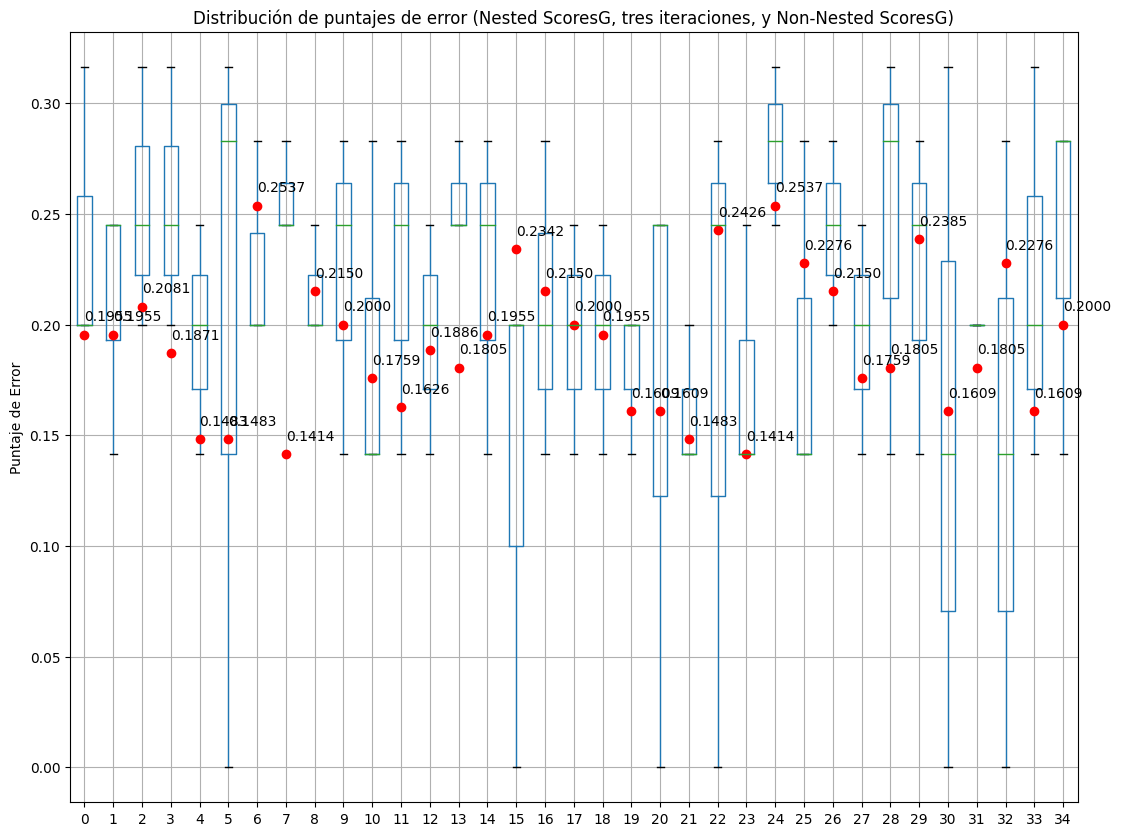

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

# Crear el boxplot
pd.DataFrame(nested_scoresG).transpose().boxplot(ax=ax)

# Agregar los valores de los puntajes de error no anidados
ax.plot(range(1, len(non_nested_scoresG) + 1), non_nested_scoresG, 'ro', markersize=6)

# Anotar los valores de los puntajes no anidados en el gráfico
for i, score in enumerate(non_nested_scoresG):
    ax.annotate(f'{score:.4f}', (i+1, score), xytext=(0, 10), textcoords='offset points')

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error')

ax.set_title('Distribución de puntajes de error (Nested ScoresG, tres iteraciones, y Non-Nested ScoresG)')

# Mostrar el gráfico
plt.show()

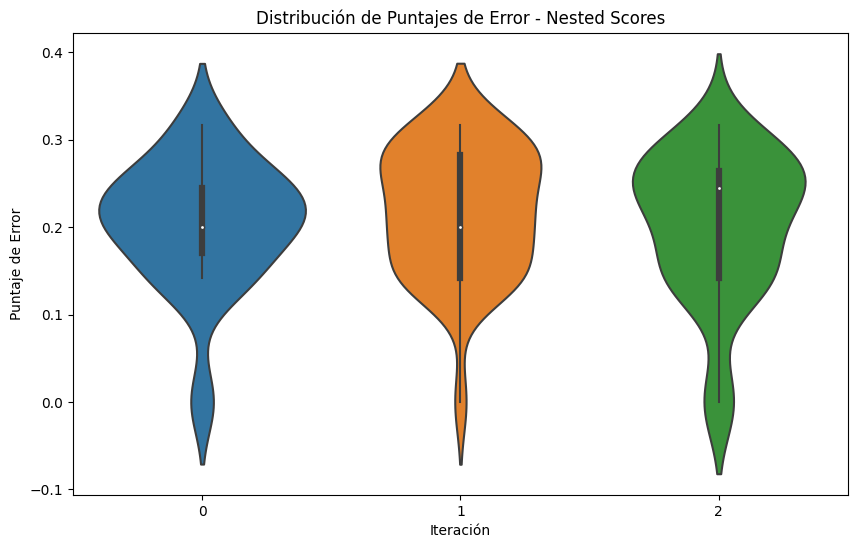

In [ ]:
df_nested_scoresG = pd.DataFrame(nested_scoresG)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_nested_scoresG)
plt.xlabel('Iteración')
plt.ylabel('Puntaje de Error')
plt.title('Distribución de Puntajes de Error - Nested Scores')
plt.show()

### 5.1.2 RandomSearch

In [ ]:
print(non_nested_scoresR)

[0.22618737330055627, 0.22595666942250134, 0.17138771086543717, 0.21847279434894482, 0.20876999955451922, 0.22618737330055627, 0.23068338443614297, 0.22618737330055627, 0.22595666942250134, 0.17138771086543717, 0.20876999955451922, 0.22618737330055627, 0.22618737330055627, 0.21774693895741323, 0.20325790602840757, 0.22618737330055627, 0.18637189530791945, 0.20325790602840757, 0.24087089859554456, 0.22618737330055627, 0.22618737330055627, 0.22618737330055627, 0.21774693895741323, 0.17138771086543717, 0.22618737330055627, 0.18607123616042545, 0.21774693895741323, 0.22618737330055627, 0.21847279434894482, 0.20306341366242495, 0.23068338443614297, 0.22618737330055627, 0.22618737330055627, 0.2161943515071373, 0.24087089859554456]


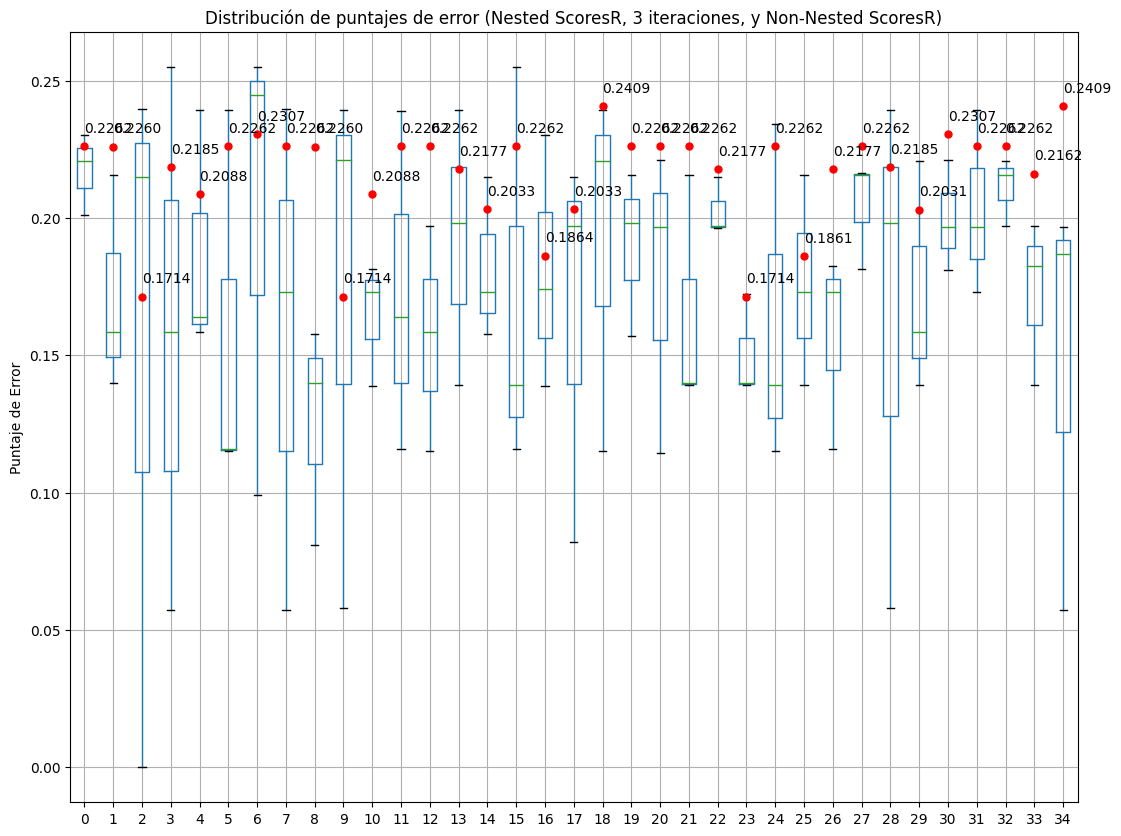

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

# Crear el boxplot
pd.DataFrame(nested_scoresR).transpose().boxplot(ax=ax)

# Agregar los valores de los puntajes de error no anidados
ax.plot(range(1, len(non_nested_scoresR) + 1), non_nested_scoresR, 'ro', markersize=5)

# Anotar los valores de los puntajes no anidados en el gráfico
for i, score in enumerate(non_nested_scoresR):
    ax.annotate(f'{score:.4f}', (i+1, score), xytext=(0, 10), textcoords='offset points')

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error')

ax.set_title('Distribución de puntajes de error (Nested ScoresR, 3 iteraciones, y Non-Nested ScoresR)')

# Mostrar el gráfico
plt.show()

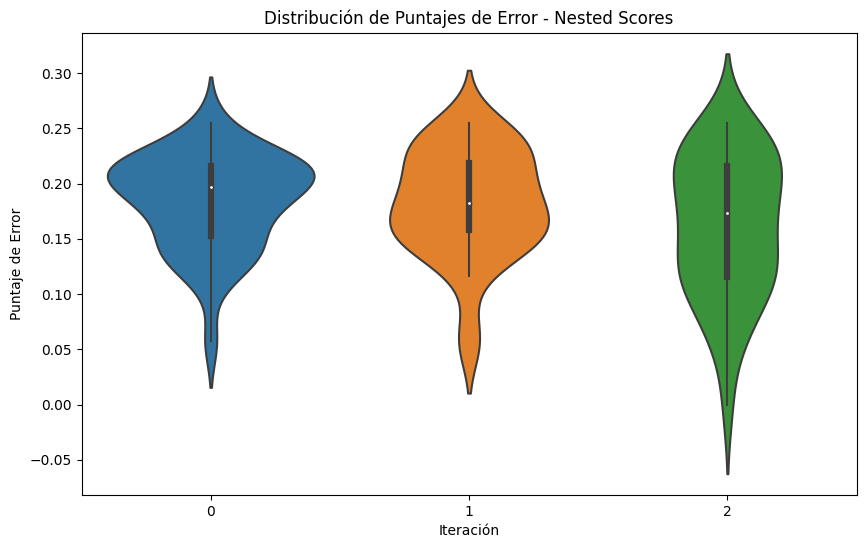

In [ ]:
df_nested_scoresR = pd.DataFrame(nested_scoresR)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_nested_scoresR)
plt.xlabel('Iteración')
plt.ylabel('Puntaje de Error')
plt.title('Distribución de Puntajes de Error - Nested Scores')
plt.show()

### 5.1.3 Coarse finer search


In [ ]:
print(non_nested_scoresC)

[0.22442984265383306, 0.2030399462692431, 0.2030399462692431, 0.224429842653833, 0.2030399462692431, 0.18257418583505536, 0.22442984265383306, 0.2609446798208441, 0.23304982641258346, 0.2609446798208441, 0.23603561790776842, 0.22442984265383306, 0.22442984265383306, 0.21282406739989765, 0.19769912661747652, 0.19769912661747652, 0.2030399462692431, 0.21464572152317846, 0.23603561790776842, 0.22144405115864813, 0.22442984265383306, 0.20930490187141187, 0.24084288741980248, 0.23603561790776842, 0.22442984265383306, 0.21282406739989765, 0.22442984265383306, 0.25116055869018955, 0.22442984265383306, 0.22442984265383306, 0.21464572152317846, 0.22144405115864813, 0.2030399462692431, 0.22442984265383306, 0.2342139637844876]


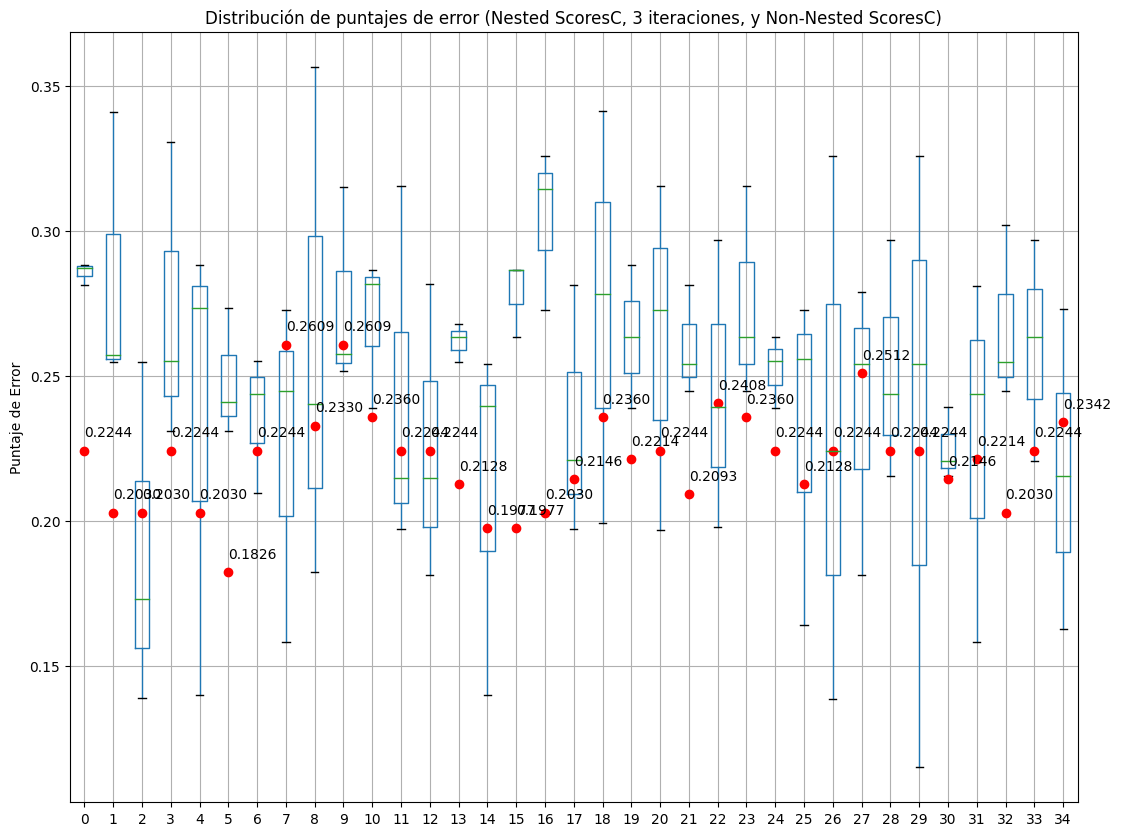

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

# Crear el boxplot
pd.DataFrame(nested_scoresC).transpose().boxplot(ax=ax)

# Agregar los valores de los puntajes de error no anidados
ax.plot(range(1, len(non_nested_scoresC) + 1), non_nested_scoresC, 'ro', markersize=6)

# Anotar los valores de los puntajes no anidados en el gráfico
for i, score in enumerate(non_nested_scoresC):
    ax.annotate(f'{score:.4f}', (i+1, score), xytext=(0, 10), textcoords='offset points')

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error')

ax.set_title('Distribución de puntajes de error (Nested ScoresC, 3 iteraciones, y Non-Nested ScoresC)')

# Mostrar el gráfico
plt.show()

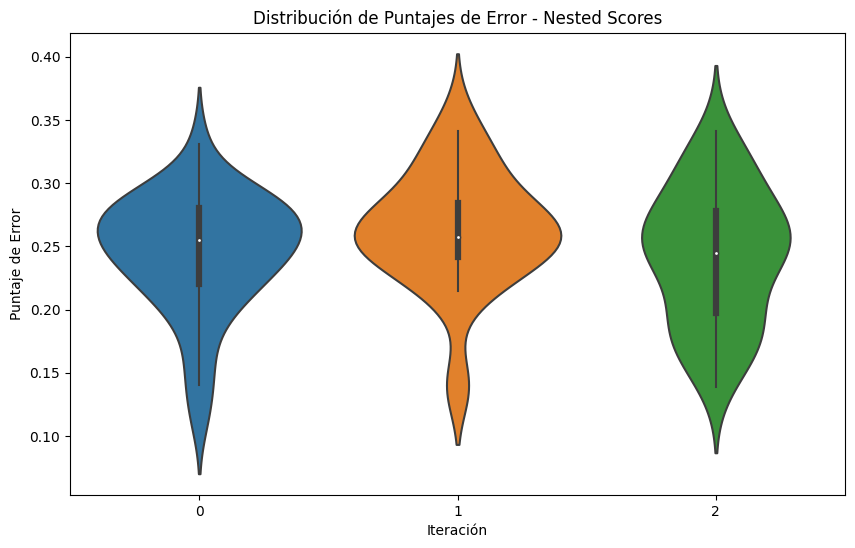

In [ ]:
# Crear un DataFrame con los datos de nested_scoresC
df_nested_scoresC = pd.DataFrame(nested_scoresC)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el diagrama de violín con Seaborn
sns.violinplot(data=df_nested_scoresC)

# Configurar etiquetas de los ejes
plt.xlabel('Iteración')
plt.ylabel('Puntaje de Error')
plt.title('Distribución de Puntajes de Error - Nested Scores')
# Mostrar el gráfico
plt.show()

## 6 Comparación de modelos

### 6.1 Basado solamente en los gráficos de violin plot — ¿Cuál/Cuáles estratégia(s) escogeria usted? Por qué?

Elegiríamos el RandomSearch, debido a que, en el gráfico, no muestra a más detalles como varia el ancho, la moda, mediana, su densidad de probabilidad, comparado a las otras estrategias.Es decir, en el gráfico de RandomSearch podemos observar que su puntos de error son, en promedio, más bajos a las otras dos estrategias, principalmente. En el gráfico de RandomSearch, estos puntajes principalmente oscilan dentro de 0.10 a 0.25 en Puntaje de error en la mayoria de resultados en las iteraciones, encontrandose la mediana de las 3 iteraciones en estos rangos (especificamente entre 0.15-0.20).

### 6.2 Análisis de los resultados: Reportar una tabla con la siguiente información

In [ ]:
print("Promedio del error de generalización estimado en Non nested y Nested con Grigsearch:", average_errorGn, average_errorG);
print("Desviacion estandar en Non nested y Nested con Grigsearch:", std_scoreGn, std_scoreG)

Promedio del error de generalización estimado en Non nested y Nested con Grigsearch: 0.1918847155497106 0.2079552403932401
Desviacion estandar en Non nested y Nested con Grigsearch: 0.03173941398718449 0.07554468178085517


In [ ]:
print("Promedio del error de generalización estimado en Non nested y Nested con Randomsearch:", average_errorRn, average_errorR);
print("Desviacion estandar en Non nested y Nested con Randomsearch:", std_scoreRn, std_scoreR)

Promedio del error de generalización estimado en Non nested y Nested con Randomsearch: 0.2158732572510232 0.17522412600382978
Desviacion estandar en Non nested y Nested con Randomsearch: 0.01818757709656565 0.05261951773219714


In [ ]:
print("Promedio del error de generalización estimado en Non nested y Nested con Coarse finer search:", average_errorCn, average_errorC);
print("Desviacion estandar en Non nested y Nested con Coarse finer search::", std_scoreCn, std_scoreC)

Promedio del error de generalización estimado en Non nested y Nested con Coarse finer search: 0.22166561346615155 0.2500474754052908
Desviacion estandar en Non nested y Nested con Coarse finer search:: 0.01701537448853967 0.0488265726615608


In [ ]:
print("Test Score (Accuracy) Gridsearch:", test_scoreG)
print("Test Score (Accuracy) Randomsearch:", test_scoreR)
print("Test Score (Coarse Strategy):", test_score_coarse)
print("Test Score (Finer Strategy):", test_score_finer)

Test Score (Accuracy) Gridsearch: 0.9736842105263158
Test Score (Accuracy) Randomsearch: 0.9736842105263158
Test Score (Coarse Strategy): 0.9473684210526315
Test Score (Finer Strategy): 1.0


In [ ]:
              Non-nested CV                                       Nested CV                                              Test score        Ranking basado en grafico

Estrategia 1 (mean/std) 0.1918847155497106/0.03173941398718449  (mean/std) 0.2079552403932401/0.07554468178085517       0.9736842105263158               2
Estrategia 2 (mean/std) 0.2158732572510232/0.01818757709656565    (mean/std) 0.17522412600382978/0.05261951773219714    0.9736842105263158               1
Estrategia 3 (mean/std) 0.22166561346615155/0.22166561346615155  (mean/std) 0.2500474754052908/0.0488265726615608            1.0                         3